**Лабораторная работа.** Применение алгоритмов Process mining для анализа журналов событий Цель: изучение алгоритмов Process mining для анализа журналов событий и поиска "узких мест" в системе по журналу.

Для выполнения работы используются язык Python и библиотеки PM4PY, Pandas.

Данные:

Начало работы. Чтение журнала событий Библиотека pm4py работает как с форматами данных CSV (стандарт файлов для Pandas), так и с форматами XES — это стандартный формат, используемый для хранения журналов событий.

Два соответствующих форматов в модуле есть два метода:

converter из pm4py.objects.conversion.log (здесь псевдоним log_converter), который преобразует стандартные фреймы данных pandas в журналы событий; importer из pm4py.objects.log.importer.xes (здесь псевдоним xes_importer), который импортирует журналы. в формате XES. Для того, чтобы считать файл в формате .csv для дальнейшей работы, сначала необходимо его импортировать с помощью библиотеки pandas в DataFrame. Далее с помощью метода библиотеки pm4py.objects.conversion.log.converter преобразуем его в журнал событий.


In [ ]:
# Установка библиотеки для Process mining
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26114 sha256=5580c7de48a2de367252ece6db9e8bae50418b13a261902da380c75d12921df6
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=24960 sha256=51cd6fe2c8fc2679b1d5b7cf9748501d1d768978cf6c01bea838e4c68dce265c
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist


In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

In [ ]:
# Считывание файла в формате .xes
#log = xes_importer.apply('<path_to_xes_file.xes>')

In [ ]:
# Считывание файла в формате .csv

# 1. Считываем сначала наши данные с помощью библиотеки Pandas в DataFrame
log_csv = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Process_mining_lab_hes/main/ArtificialPatientTreatment.csv')

log_csv

,patient,action,org:resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09
...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13


In [ ]:
type(log_csv)

pandas.core.frame.DataFrame

**Перед началом работы с любым набором данных, необходимо сначала его изучить:**
- названия колонок
- типы данных
- пропущенные значения
- и другое

In [ ]:
log_csv.columns

Index(['patient', ' action', ' org:resource', ' DateTime'], dtype='object')

In [ ]:
# Преобразуем тип данных в колонке DateTime в специальных формат даты и времени библиотеки Pandas
log_csv[' DateTime'] = pd.to_datetime(log_csv[' DateTime'])

log_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   patient        690 non-null    object        
 1    action        690 non-null    object        
 2    org:resource  690 non-null    object        
 3    DateTime      690 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 21.7+ KB


In [ ]:
# Создаем сгруппированную таблицу с начальной отметкой времени и конечной для каждого case
case_starts_ends = log_csv.pivot_table(index='patient', aggfunc={' DateTime': ['min', 'max']}) 

case_starts_ends

DateTime                    
                           max                 min
patient                                           
patient 0  2017-01-09 08:29:28 2017-01-02 11:40:11
patient 1  2017-01-06 16:49:21 2017-01-02 12:50:35
patient 10 2017-01-30 11:19:19 2017-01-17 14:13:17
patient 11 2017-02-02 10:13:13 2017-01-19 13:35:20
patient 12 2017-01-27 11:18:57 2017-01-20 11:43:38
...                        ...                 ...
patient 95 2017-05-26 10:19:34 2017-05-15 09:15:08
patient 96 2017-05-24 16:38:21 2017-05-15 10:31:45
patient 97 2017-05-22 14:37:56 2017-05-17 08:44:01
patient 98 2017-05-31 14:16:13 2017-05-17 10:56:48
patient 99 2017-05-31 12:46:43 2017-05-18 11:57:11

[100 rows x 2 columns]

In [ ]:
case_starts_ends = case_starts_ends.reset_index()
case_starts_ends.columns = ['patient', 'caseend', 'casestart'] 
# Merge with the main event log data so that for each row we have the start and end times.
log_csv = log_csv.merge(case_starts_ends, on='patient') 
# Calculate the relative time by subtracting the process start time from the event timestamp
log_csv['relativetime'] = log_csv[' DateTime'] - log_csv['casestart']
# Convert relative times to more friendly measures
## seconds
log_csv['relativetime_s'] = log_csv['relativetime'].dt.seconds + 86400*log_csv['relativetime'].dt.days 
## days
log_csv['relativedays'] = log_csv['relativetime'].dt.days

log_csv

,patient,action,org:resource,DateTime,caseend,casestart,relativetime,relativetime_s,relativedays
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3
...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11


In [ ]:
log_csv['caselength'] = log_csv['caseend'] - log_csv['casestart']

log_csv

,patient,action,org:resource,DateTime,caseend,casestart,relativetime,relativetime_s,relativedays,caselength
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0,6 days 20:49:17
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0,6 days 20:49:17
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0,6 days 20:49:17
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0,6 days 20:49:17
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3,6 days 20:49:17
...,...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6,13 days 00:49:32
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6,13 days 00:49:32
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11,13 days 00:49:32
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11,13 days 00:49:32


<Axes: xlabel='relativetime_s', ylabel='patient'>

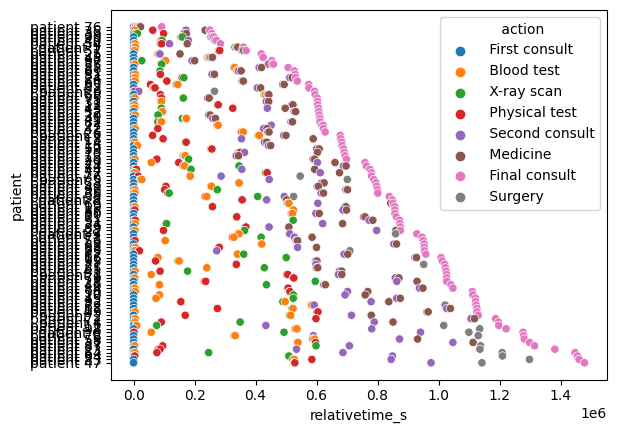

In [ ]:
## Order by the case length
ordered = log_csv.sort_values(by=['caselength', 'patient', 'relativetime_s'])

# plt.figure(figsize=(15,15))
sns.scatterplot(x=ordered['relativetime_s'], y=ordered['patient'], hue=ordered[' action'])

In [ ]:
patient_events = pd.crosstab(log_csv['patient'], log_csv[' action']) 
patient_events

action,Blood test,Final consult,First consult,Medicine,Physical test,Second consult,Surgery,X-ray scan
patient,,,,,,,,
patient 0,1,1,1,0,1,1,1,0
patient 1,1,1,1,1,1,1,0,1
patient 10,1,1,1,1,1,1,0,1
patient 11,1,1,1,0,1,1,1,1
patient 12,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
patient 95,1,1,1,0,1,1,1,0
patient 96,1,1,1,1,1,1,0,1
patient 97,1,1,1,1,1,1,0,1


In [ ]:
len(log_csv['patient'].unique())

100

In [ ]:
patient_events.sum()

 action
 Blood test        100
 Final consult     100
 First consult     100
 Medicine           80
 Physical test     100
 Second consult    100
 Surgery            20
 X-ray scan         90
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' First consult'),
  Text(1, 0, ' Blood test'),
  Text(2, 0, ' Physical test'),
  Text(3, 0, ' Second consult'),
  Text(4, 0, ' Surgery'),
  Text(5, 0, ' Final consult'),
  Text(6, 0, ' X-ray scan'),
  Text(7, 0, ' Medicine')])

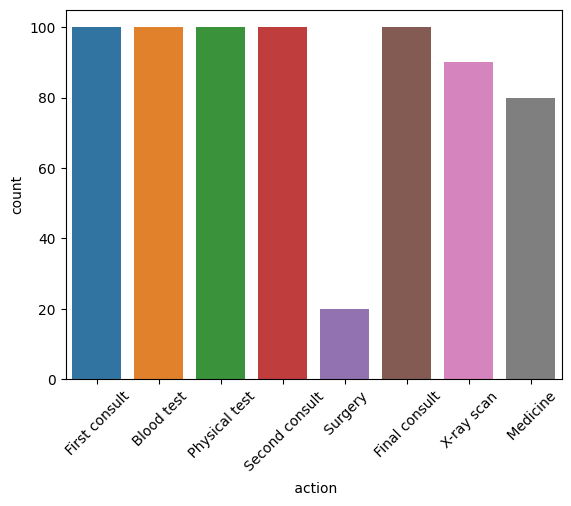

In [ ]:
sns.countplot(x=log_csv[' action'])
plt.xticks(rotation=45)

In [ ]:
patient_events.sum(axis=1)

patient
patient 0     6
patient 1     7
patient 10    7
patient 11    7
patient 12    7
             ..
patient 95    6
patient 96    7
patient 97    7
patient 98    7
patient 99    7
Length: 100, dtype: int64

**Для работы с журналом событий Process mining определяет основные атрибуты событий в журналах:**

- **Идентификатор случая (case id):** хранит случаи (объекты), для которых выстраиваются последовательности событий журнала.
- **Деятельность (activity name):** хранит действия, выполняемые в рамках событий журнала.
- **Отметка времени (timestamp):** хранит дату и время регистрации событий журнала.
- **Ресурс (resource):** хранит основных действующих лиц событий журнала (тех, кто выполняет действия в рамках событий журнала).
- **Прочее (other data):** сюда попадает вся оставшаяся в журнале (не интересная нам) информация. 

В данной задаче за Case id обозначаем отдельного пациента, а за activity name обозначаем все действия пациентов.

In [ ]:
# 2. Переименуем колонки в соответсвии с требованиями Process mining
log_csv.rename(columns=
                {' DateTime': 'time:timestamp',
                 'patient': 'case:concept:name',
                 ' action': 'concept:name',
                 ' org:resource': 'org:resource'},
                inplace=True)

log_csv

,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0,6 days 20:49:17
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0,6 days 20:49:17
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0,6 days 20:49:17
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0,6 days 20:49:17
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3,6 days 20:49:17
...,...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6,13 days 00:49:32
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6,13 days 00:49:32
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11,13 days 00:49:32
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11,13 days 00:49:32


In [ ]:
# 3. Преобразуем DataFrame в формат журнала Process mining
event_log = log_converter.apply(log_csv)

# Видим, что теперь тип наших данных EventLog
type(event_log)

pm4py.objects.log.obj.EventLog

In [ ]:
event_log

[{'attributes': {'concept:name': 'patient 0'}, 'events': [{'concept:name': ' First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': Timestamp('2017-01-02 11:40:11'), 'caseend': Timestamp('2017-01-09 08:29:28'), 'casestart': Timestamp('2017-01-02 11:40:11'), 'relativetime': Timedelta('0 days 00:00:00'), 'relativetime_s': 0, 'relativedays': 0, 'caselength': Timedelta('6 days 20:49:17')}, '..', {'concept:name': ' Final consult', 'org:resource': ' Dr. Ben', 'time:timestamp': Timestamp('2017-01-09 08:29:28'), 'caseend': Timestamp('2017-01-09 08:29:28'), 'casestart': Timestamp('2017-01-02 11:40:11'), 'relativetime': Timedelta('6 days 20:49:17'), 'relativetime_s': 593357, 'relativedays': 6, 'caselength': Timedelta('6 days 20:49:17')}]}, '....', {'attributes': {'concept:name': 'patient 99'}, 'events': [{'concept:name': ' First consult', 'org:resource': ' Dr. Bob', 'time:timestamp': Timestamp('2017-05-18 11:57:11'), 'caseend': Timestamp('2017-05-31 12:46:43'), 'casestart': Timestamp('20

In [ ]:
log_csv.shape

(690, 10)

In [ ]:
# Количество различных событий в нашем журнале событий

len(log_csv)

690

In [ ]:
# Количество всех кейсов в нашем журнале событий

len(event_log)

100

In [ ]:
len(event_log[0])

6

**Важно!** помнить что кейс состоит из набора различных событий, которые относятся к одному пациенту.

Используя библиотеки PM4Py и Pandas можно исследовать имещейся журнал событий с разных сторон.

Например, посмотреть частотные признаки по врачам.

In [ ]:
from pm4py.algo.filtering.log.attributes import attributes_filter

activities = attributes_filter.get_attribute_values(log_csv, "org:resource")
activities

{' Dr. Anna': 158,
 ' Lab': 100,
 ' Nurse Jesse': 57,
 ' Dr. Charlie': 5,
 ' Dr. Ben': 50,
 ' Team 1': 40,
 ' Pharmacy': 80,
 ' Team 2': 50,
 ' Nurse Corey': 43,
 ' Dr. Bob': 92,
 ' Dr. Rudy': 7,
 ' Dr. Alex': 5,
 ' Dr. Quinn': 3}

In [ ]:
from pm4py.algo.filtering.log.attributes import attributes_filter

activities = attributes_filter.get_attribute_values(log_csv, 'concept:name')
activities

{' First consult': 100,
 ' Blood test': 100,
 ' Physical test': 100,
 ' Second consult': 100,
 ' Surgery': 20,
 ' Final consult': 100,
 ' X-ray scan': 90,
 ' Medicine': 80}

Также можно посмотреть на различные вариации событий в различных кейсах и насколько они совпадают или различаются.

Вариант — это набор кейсов, которые имеют одну и ту же перспективу потока управления, то есть набор кейсов, которые используют одни и те же события в одном и том же порядке. Для исследования различных вариантов существует метод библиотеки PM4PY

In [ ]:
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics

variants = variants_filter.get_variants(event_log)
print(f"У нас есть: {len(variants)} различных вариантов путей в нашем журнале событий")

У нас есть: 15 различных вариантов путей в нашем журнале событий


In [ ]:
# можно посмотреть на эти различные варианты
# 'count' - сколько данные набор событий в такой последовательности встречается в журнале событий
# 'variant' - набор этих действий и их последовательность
# всего 15 словарей - так как 15 вариантов
variants_count = case_statistics.get_variant_statistics(log_csv)

variants_count

[{'variant': (' First consult',
   ' Blood test',
   ' X-ray scan',
   ' Physical test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 18},
 {'variant': (' First consult',
   ' Blood test',
   ' Physical test',
   ' X-ray scan',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 14},
 {'variant': (' First consult',
   ' X-ray scan',
   ' Physical test',
   ' Blood test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 12},
 {'variant': (' First consult',
   ' Physical test',
   ' X-ray scan',
   ' Blood test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 11},
 {'variant': (' First consult',
   ' Physical test',
   ' Blood test',
   ' X-ray scan',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 10},
 {'variant': (' First consult',
   ' X-ray scan',
   ' Blood test',
   ' Physical test',
   ' Second consult',
   ' Medicine',
   ' Final consult'),
  'count': 9},
 {'variant'

## Построение модели по журналу событий

### Alpha Miner

**Alpha miner** — один из самых известных алгоритмов интеллектуального анализа процессов и один из первых алгоритмов, способных обнаруживать параллелизм. Алгоритм использует прямую последовательность , причинно -следственные , параллельные и несвязанные отношения между переходами в журнале для обнаружения сети рабочего процесса.

http://mlwiki.org/index.php/Alpha_Algorithm

In [ ]:
# Импортируем алгоритм из библиотеки PM4PY
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

# Создаем алгоритм
net, initial_marking, final_marking = alpha_miner.apply(event_log)

Полученный процесс мы можем отобразить с помощью **Сетей Петри**.

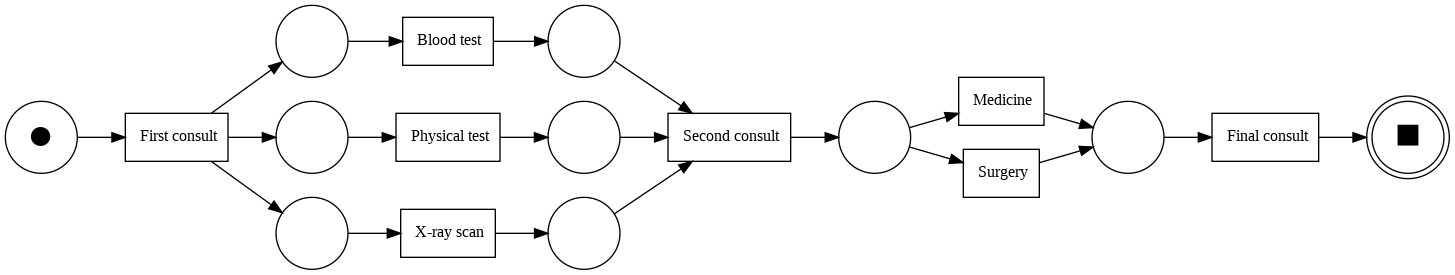

In [ ]:
# Импортируем метод визуализации Сетей Петри из библиотеки PM4Py
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import graphviz

gviz = pn_visualizer.apply(net, initial_marking, final_marking)

pn_visualizer.view(gviz)

Чтобы получить представление о частоте переходов, можно установить параметр `pn_visualizer.Variants.FREQUENCY` при вызове `pn_visualizer.apply()`.

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

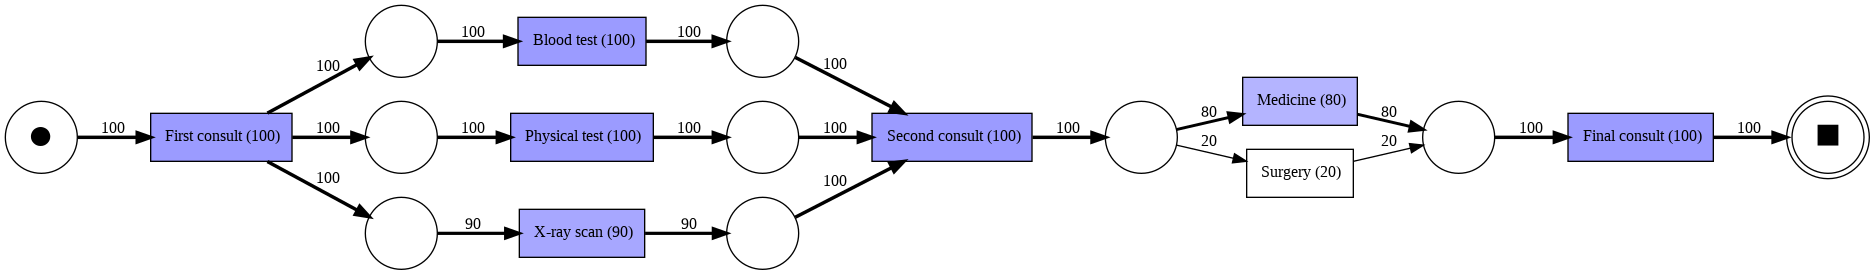

In [ ]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

gviz = pn_visualizer.apply(net, initial_marking,
                           final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=event_log)

pn_visualizer.view(gviz)

In [ ]:
# Полученные модели процессов можно сохранить

pn_visualizer.save(gviz, "alpha_miner_lab.png")

Функция `get_transition_performance_with_token_replay` принимает журнал событий, представление сети Петри обнаруженной модели процесса, а также начальные и конечные маркировки, которые мы хотим учитывать в модели. Он возвращает словарь, содержащий показатели производительности (значения словаря), связанные с каждым из Activity (ключи словаря).

Словарь содержит как все значения для данного Activity, а также среднее значение, медиану, максимум и минимум по времени на данное действие. Анализируя полученые traces можно посчитать различное время отдельных событий.

In [ ]:
from pm4py.visualization.petri_net.util import performance_map
# pm4py.objects.petri.performance_map.get_transition_performance_with_token_replay

traces = performance_map.get_transition_performance_with_token_replay(event_log,
                                                                      net,
                                                                      initial_marking,
                                                                      final_marking)

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
traces.keys()

dict_keys(["( First consult, ' First consult')", "( X-ray scan, ' X-ray scan')", "( Physical test, ' Physical test')", "( Blood test, ' Blood test')", "( Second consult, ' Second consult')", "( Surgery, ' Surgery')", "( Medicine, ' Medicine')", "( Final consult, ' Final consult')"])

In [ ]:
log_csv[log_csv['case:concept:name'] == 'patient 13']

,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength
89,patient 13,First consult,Dr. Bob,2017-01-23 15:09:10,2017-01-31 15:49:44,2017-01-23 15:09:10,0 days 00:00:00,0,0,8 days 00:40:34
90,patient 13,X-ray scan,Team 2,2017-01-25 12:29:05,2017-01-31 15:49:44,2017-01-23 15:09:10,1 days 21:19:55,163195,1,8 days 00:40:34
91,patient 13,Physical test,Nurse Jesse,2017-01-25 13:34:31,2017-01-31 15:49:44,2017-01-23 15:09:10,1 days 22:25:21,167121,1,8 days 00:40:34
92,patient 13,Blood test,Lab,2017-01-25 14:25:04,2017-01-31 15:49:44,2017-01-23 15:09:10,1 days 23:15:54,170154,1,8 days 00:40:34
93,patient 13,Second consult,Dr. Anna,2017-01-27 12:37:29,2017-01-31 15:49:44,2017-01-23 15:09:10,3 days 21:28:19,336499,3,8 days 00:40:34
94,patient 13,Medicine,Pharmacy,2017-01-27 14:47:02,2017-01-31 15:49:44,2017-01-23 15:09:10,3 days 23:37:52,344272,3,8 days 00:40:34
95,patient 13,Final consult,Dr. Ben,2017-01-31 15:49:44,2017-01-31 15:49:44,2017-01-23 15:09:10,8 days 00:40:34,693634,8,8 days 00:40:34


<Axes: xlabel='time:timestamp', ylabel='org:resource'>

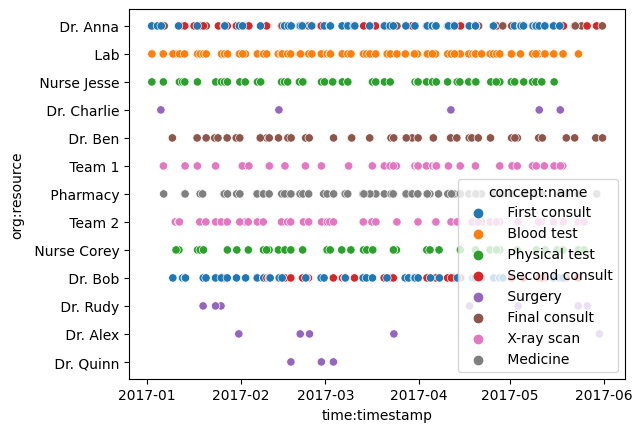

In [ ]:
sns.scatterplot(x=log_csv['time:timestamp'], y=log_csv['org:resource'], hue=log_csv['concept:name'])

## Задания. Изучение журнала событий

1. Каково минимальное и максимальное количество событий в одном случае?
2. Какие события являются общими для всех процессов?
3. Найдите наибоее часто встречающуюся последовательность событий.
4. Какой пациент на лечение тратил меньше всего времени, а какой больше?
6. Создать в DataFrame новую колонку, в которой будет записано количество событий для данного процесса (NumActions in Case)
7. Pation 13 с каким врачом/врачами он/она консультировался?
8. Какое событие является наиболее ресурсоёмким в данном журнале событий?
9. Есть ли врачи или медсестры, которые перегружены работой?
10. Какие мероприятия (actions) непропорционально отнимают время у некоторых врачей и медсестер? Каково распределение событий среди врачей и медсестер?
11. Какие события связаны с узкими местами и какие ресурсы задействованы?
12. Постройте график/и распределения времени между первой консультацией и следующим действием пациента. Каково среднее время между первой консультацией и следующим шагом лечения? Каково максимальное и минимальное время?
13. Используя библиотеки PM4PY и networkx, создайте граф социальных связей по данному журналу событий, используя метрику SNA.
Документация: https://pm4py.fit.fraunhofer.de/documentation#social-network-analysis

#### **1. Каково минимальное и максимальное количество событий в одном случае?**

In [ ]:
print(f'min: {min(patient_events.sum(axis=1))}')

min: 6


In [ ]:
print(f'max: {max(patient_events.sum(axis=1))}')

max: 7


#### **2. Какие события являются общими для всех процессов?**

In [ ]:
set.intersection(*[set(x['variant']) for x in variants_count])

{' Blood test',
 ' Final consult',
 ' First consult',
 ' Physical test',
 ' Second consult'}

#### **3. Найдите наибоее часто встречающуюся последовательность событий**

In [ ]:
counts = [var['count'] for var in variants_count]
vars = [var['variant'] for var in variants_count]
print({vars[0]})

{(' First consult', ' Blood test', ' X-ray scan', ' Physical test', ' Second consult', ' Medicine', ' Final consult')}


#### **4. Какой пациент на лечение тратил меньше всего времени, а какой больше?**

In [ ]:
times = log_csv[['case:concept:name', 'caselength']].drop_duplicates()
times = times.groupby('case:concept:name')['caselength'].sum()
print('Пациент, потративший на лечение больше всего времени:', times.idxmax())
print('длительность лечения:', times.loc[times.idxmax()])
print('Пациент, потративший на лечение меньше всего времени:', times.idxmin())
print('длительность лечения:', times.loc[times.idxmin()])

Пациент, потративший на лечение больше всего времени: patient 47
длительность лечения: 17 days 02:43:04
Пациент, потративший на лечение меньше всего времени: patient 76
длительность лечения: 1 days 01:34:04


#### **5. Создать в DataFrame новую колонку, в которой будет записано количество событий для данного процесса (NumActions in Case)**

In [ ]:
log_csv['NumActions in Case'] = log_csv.groupby('case:concept:name').cumcount() + 1
log_csv

,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength,NumActions in Case
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0,6 days 20:49:17,1
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0,6 days 20:49:17,2
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:13:39,4419,0,6 days 20:49:17,3
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 04:40:55,16855,0,6 days 20:49:17,4
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-09 08:29:28,2017-01-02 11:40:11,3 days 01:42:58,265378,3,6 days 20:49:17,5
...,...,...,...,...,...,...,...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:06:16,601576,6,13 days 00:49:32,3
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24,2017-05-31 12:46:43,2017-05-18 11:57:11,6 days 23:58:13,604693,6,13 days 00:49:32,4
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 03:15:28,962128,11,13 days 00:49:32,5
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13,2017-05-31 12:46:43,2017-05-18 11:57:11,11 days 04:20:02,966002,11,13 days 00:49:32,6


#### **6. Pation 13 с каким врачом/врачами он/она консультировался?**

In [ ]:
log_csv[log_csv['case:concept:name'] == 'patient 13'][['case:concept:name', 'org:resource']]

,case:concept:name,org:resource
89,patient 13,Dr. Bob
90,patient 13,Team 2
91,patient 13,Nurse Jesse
92,patient 13,Lab
93,patient 13,Dr. Anna
94,patient 13,Pharmacy
95,patient 13,Dr. Ben


#### **7. Какое событие является наиболее ресурсоёмким в данном журнале событий?**

In [ ]:
log_csv.query(f"relativetime_s == {max(log_csv['relativetime_s'])}")

,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength,NumActions in Case
327,patient 47,Final consult,Dr. Anna,2017-03-27 12:10:48,2017-03-27 12:10:48,2017-03-10 09:27:44,17 days 02:43:04,1478584,17,17 days 02:43:04,7


#### **8. Есть ли врачи или медсестры, которые перегружены работой?**

In [ ]:
log_csv['org:resource'].value_counts()

 Dr. Anna       158
 Lab            100
 Dr. Bob         92
 Pharmacy        80
 Nurse Jesse     57
 Dr. Ben         50
 Team 2          50
 Nurse Corey     43
 Team 1          40
 Dr. Rudy         7
 Dr. Charlie      5
 Dr. Alex         5
 Dr. Quinn        3
Name: org:resource, dtype: int64

#### **9. Какие мероприятия (actions) непропорционально отнимают время у некоторых врачей и медсестер? Каково распределение событий среди врачей и медсестер?**

In [ ]:
log_csv[['org:resource', 'concept:name']].value_counts()

org:resource  concept:name   
 Lab           Blood test        100
 Pharmacy      Medicine           80
 Nurse Jesse   Physical test      57
 Dr. Anna      Second consult     55
               First consult      53
               Final consult      50
 Dr. Ben       Final consult      50
 Team 2        X-ray scan         50
 Dr. Bob       First consult      47
               Second consult     45
 Nurse Corey   Physical test      43
 Team 1        X-ray scan         40
 Dr. Rudy      Surgery             7
 Dr. Alex      Surgery             5
 Dr. Charlie   Surgery             5
 Dr. Quinn     Surgery             3
dtype: int64

In [ ]:
log_csv['org:resource'].value_counts() / log_csv['org:resource'].value_counts().sum()

 Dr. Anna       0.228986
 Lab            0.144928
 Dr. Bob        0.133333
 Pharmacy       0.115942
 Nurse Jesse    0.082609
 Dr. Ben        0.072464
 Team 2         0.072464
 Nurse Corey    0.062319
 Team 1         0.057971
 Dr. Rudy       0.010145
 Dr. Charlie    0.007246
 Dr. Alex       0.007246
 Dr. Quinn      0.004348
Name: org:resource, dtype: float64

#### **10. Какие события связаны с узкими местами и какие ресурсы задействованы?**

In [ ]:
log_csv[['concept:name', 'org:resource']].value_counts()

concept:name     org:resource
 Blood test       Lab            100
 Medicine         Pharmacy        80
 Physical test    Nurse Jesse     57
 Second consult   Dr. Anna        55
 First consult    Dr. Anna        53
 Final consult    Dr. Anna        50
                  Dr. Ben         50
 X-ray scan       Team 2          50
 First consult    Dr. Bob         47
 Second consult   Dr. Bob         45
 Physical test    Nurse Corey     43
 X-ray scan       Team 1          40
 Surgery          Dr. Rudy         7
                  Dr. Alex         5
                  Dr. Charlie      5
                  Dr. Quinn        3
dtype: int64

#### **11. Постройте график/и распределения времени между первой консультацией и следующим действием пациента. Каково среднее время между первой консультацией и следующим шагом лечения? Каково максимальное и минимальное время?**

In [ ]:
df_11 = log_csv.groupby('case:concept:name').head(2).reset_index(drop=True)
df_11

,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength,NumActions in Case
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 00:00:00,0,0,6 days 20:49:17,1
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0,6 days 20:49:17,2
2,patient 1,First consult,Dr. Anna,2017-01-02 12:50:35,2017-01-06 16:49:21,2017-01-02 12:50:35,0 days 00:00:00,0,0,4 days 03:58:46,1
3,patient 1,Physical test,Nurse Jesse,2017-01-02 13:59:14,2017-01-06 16:49:21,2017-01-02 12:50:35,0 days 01:08:39,4119,0,4 days 03:58:46,2
4,patient 2,First consult,Dr. Anna,2017-01-04 10:02:49,2017-01-17 11:54:48,2017-01-04 10:02:49,0 days 00:00:00,0,0,13 days 01:51:59,1
...,...,...,...,...,...,...,...,...,...,...,...
195,patient 97,X-ray scan,Team 1,2017-05-17 16:12:44,2017-05-22 14:37:56,2017-05-17 08:44:01,0 days 07:28:43,26923,0,5 days 05:53:55,2
196,patient 98,First consult,Dr. Anna,2017-05-17 10:56:48,2017-05-31 14:16:13,2017-05-17 10:56:48,0 days 00:00:00,0,0,14 days 03:19:25,1
197,patient 98,X-ray scan,Team 2,2017-05-23 13:59:10,2017-05-31 14:16:13,2017-05-17 10:56:48,6 days 03:02:22,529342,6,14 days 03:19:25,2
198,patient 99,First consult,Dr. Bob,2017-05-18 11:57:11,2017-05-31 12:46:43,2017-05-18 11:57:11,0 days 00:00:00,0,0,13 days 00:49:32,1


In [ ]:
df_11_2 = df_11.loc[df_11.index % 2 == 1]
df_11_2

,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength,NumActions in Case
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-09 08:29:28,2017-01-02 11:40:11,0 days 01:07:22,4042,0,6 days 20:49:17,2
3,patient 1,Physical test,Nurse Jesse,2017-01-02 13:59:14,2017-01-06 16:49:21,2017-01-02 12:50:35,0 days 01:08:39,4119,0,4 days 03:58:46,2
5,patient 2,Physical test,Nurse Jesse,2017-01-06 09:05:01,2017-01-17 11:54:48,2017-01-04 10:02:49,1 days 23:02:12,169332,1,13 days 01:51:59,2
7,patient 3,Blood test,Lab,2017-01-06 08:15:00,2017-01-17 13:17:06,2017-01-05 16:10:58,0 days 16:04:02,57842,0,11 days 21:06:08,2
9,patient 4,Blood test,Lab,2017-01-09 13:44:25,2017-01-23 08:58:31,2017-01-09 12:35:37,0 days 01:08:48,4128,0,13 days 20:22:54,2
...,...,...,...,...,...,...,...,...,...,...,...
191,patient 95,Blood test,Lab,2017-05-15 10:22:25,2017-05-26 10:19:34,2017-05-15 09:15:08,0 days 01:07:17,4037,0,11 days 01:04:26,2
193,patient 96,Blood test,Lab,2017-05-15 11:40:18,2017-05-24 16:38:21,2017-05-15 10:31:45,0 days 01:08:33,4113,0,9 days 06:06:36,2
195,patient 97,X-ray scan,Team 1,2017-05-17 16:12:44,2017-05-22 14:37:56,2017-05-17 08:44:01,0 days 07:28:43,26923,0,5 days 05:53:55,2
197,patient 98,X-ray scan,Team 2,2017-05-23 13:59:10,2017-05-31 14:16:13,2017-05-17 10:56:48,6 days 03:02:22,529342,6,14 days 03:19:25,2


In [ ]:
df_11_2.sort_values(by=['relativetime'])

,case:concept:name,concept:name,org:resource,time:timestamp,caseend,casestart,relativetime,relativetime_s,relativedays,caselength,NumActions in Case
13,patient 6,Physical test,Nurse Jesse,2017-01-12 17:40:43,2017-01-27 12:02:52,2017-01-12 17:18:39,0 days 00:22:04,1324,0,14 days 18:44:13,2
155,patient 77,Blood test,Lab,2017-04-19 15:08:42,2017-04-28 14:55:23,2017-04-19 14:08:33,0 days 01:00:09,3609,0,9 days 00:46:50,2
159,patient 79,Blood test,Lab,2017-04-21 14:42:00,2017-05-03 10:49:42,2017-04-21 13:41:51,0 days 01:00:09,3609,0,11 days 21:07:51,2
175,patient 87,Blood test,Lab,2017-05-04 11:57:08,2017-05-19 16:11:27,2017-05-04 10:56:40,0 days 01:00:28,3628,0,15 days 05:14:47,2
189,patient 94,Blood test,Lab,2017-05-12 13:51:31,2017-05-29 09:11:38,2017-05-12 12:50:53,0 days 01:00:38,3638,0,16 days 20:20:45,2
...,...,...,...,...,...,...,...,...,...,...,...
95,patient 47,X-ray scan,Team 1,2017-03-16 11:37:27,2017-03-27 12:10:48,2017-03-10 09:27:44,6 days 02:09:43,526183,6,17 days 02:43:04,2
197,patient 98,X-ray scan,Team 2,2017-05-23 13:59:10,2017-05-31 14:16:13,2017-05-17 10:56:48,6 days 03:02:22,529342,6,14 days 03:19:25,2
75,patient 37,X-ray scan,Team 2,2017-02-28 17:01:18,2017-03-09 12:22:03,2017-02-22 11:41:54,6 days 05:19:24,537564,6,15 days 00:40:09,2
125,patient 62,X-ray scan,Team 2,2017-04-06 08:46:50,2017-04-12 15:21:36,2017-03-30 15:19:58,6 days 17:26:52,581212,6,13 days 00:01:38,2


Минимальное время: 0 days 00:22:04 (1324 c)  
Максимальное время: 6 days 19:05:18 (587118 c)

In [ ]:
print(f'Среднее время: {df_11_2.relativetime_s.mean()} с ({round(df_11_2.relativetime_s.mean() / 3600, 2)} ч)')

Среднее время: 133638.24 с (37.12 ч)


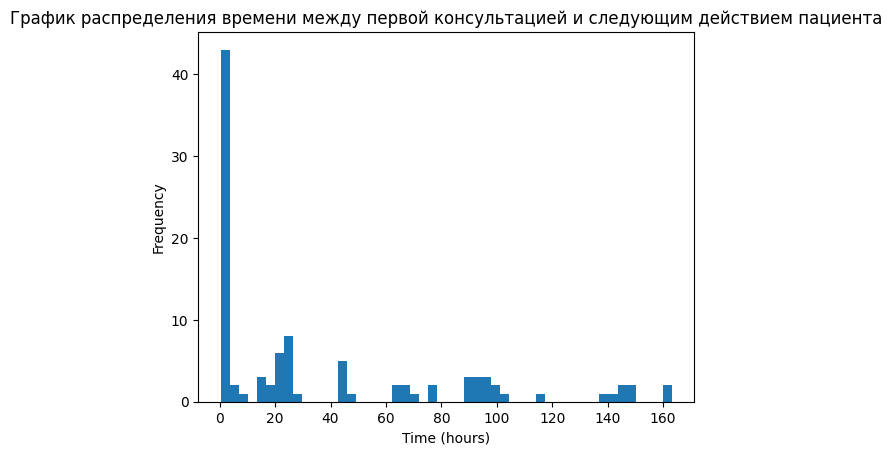

In [ ]:
plt.hist([t / 3600 for t in df_11_2.relativetime_s.tolist()], bins=50)
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')
plt.title('График распределения времени между первой консультацией и следующим действием пациента')
plt.show()

#### **12. Используя библиотеки PM4PY и networkx, создайте граф социальных связей по данному журналу событий, используя метрику SNA. Документация: https://pm4py.fit.fraunhofer.de/documentation#social-network-analysis**

In [ ]:
import networkx as nx

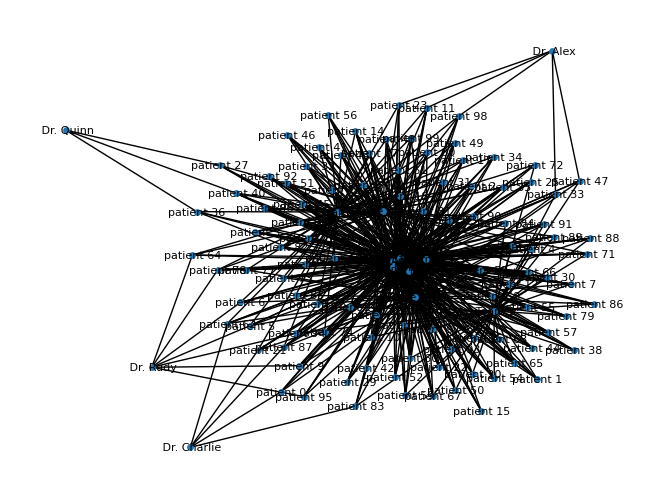

In [ ]:
G = nx.Graph()

for case in event_log:
    patient = case.attributes['concept:name']
    if patient not in G.nodes:
        G.add_node(patient)

    for event in case:
        if event['org:resource'] not in G.nodes:
            G.add_node(event['org:resource'])
        G.add_edge(patient, event['org:resource'])

nx.draw(G, with_labels=True, node_size=15, font_size=8)
plt.show()

## Задание. Обнаружение модели процессов

1. По имеющемуся набору данных постройте модель процессов используя различные алгоритмы обнаружения процесса: inductive miner, heuristics miner, Alpha Miner, DFG граф.
Для каждой модели постройте сети Петри, сравните и сделайте вывод о том, какая модель больше всего подходит в данной задаче (привести значения различных метрик).


In [ ]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import graphviz
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

#### **Alpha Miner**

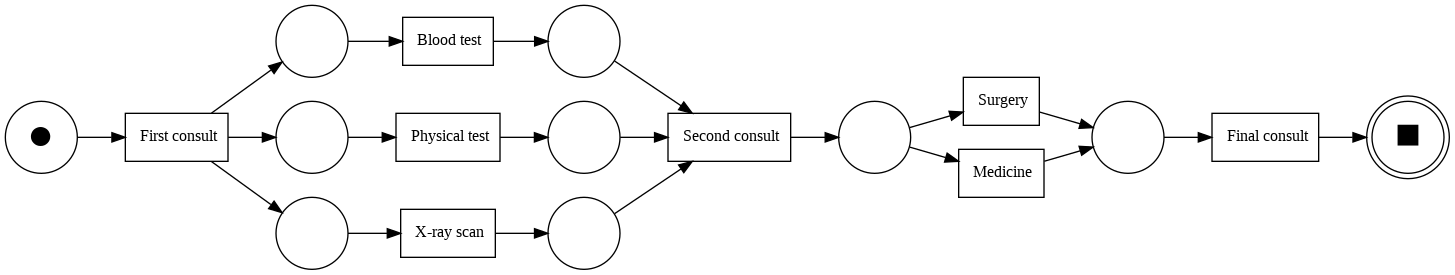

computing precision with alignments, completed variants ::   0%|          | 0/39 [00:00<?, ?it/s]


Precision = 0.9830188679245283



replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]


Generalization = 0.8823975685045107



aligning log, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]


Replay fitness = {'percFitTraces': 90.0, 'averageFitness': 0.9923076923076921, 'percentage_of_fitting_traces': 90.0, 'average_trace_fitness': 0.9923076923076921, 'log_fitness': 0.9928057553956835}


Simplicity = 0.8181818181818181



In [ ]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(event_log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)
precision = precision_evaluator.apply(event_log, net, initial_marking, final_marking)
print(f"\nPrecision = {precision}\n")
generalization = generalization_evaluator.apply(event_log, net, initial_marking, final_marking)
print(f"\nGeneralization = {generalization}\n")
replay_fitness = replay_fitness_evaluator.apply(event_log, net, initial_marking, final_marking)
print(f"\nReplay fitness = {replay_fitness}\n")
simplicity = simplicity_evaluator.apply(net)
print(f"\nSimplicity = {simplicity}\n")

In [ ]:
simplicity = simplicity_evaluator.apply(net)
print(f"\nSimplicity = {simplicity}\n")


Simplicity = 0.8181818181818181



#### **Heuristics Miner**

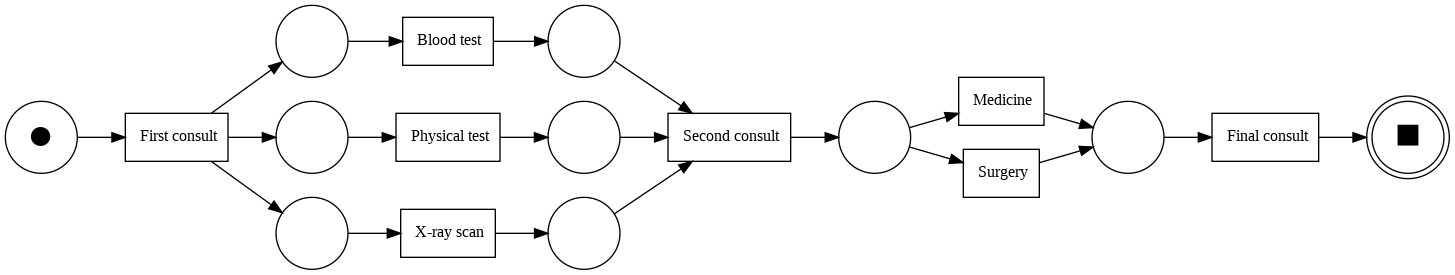

In [ ]:
from pm4py.algo.discovery.alpha import algorithm as heuristics_miner

net, initial_marking, final_marking = heuristics_miner.apply(event_log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [ ]:
precision = precision_evaluator.apply(event_log, net, initial_marking, final_marking)
print(f"\nPrecision = {precision}\n")

computing precision with alignments, completed variants ::   0%|          | 0/39 [00:00<?, ?it/s]


Precision = 0.9830188679245283



In [ ]:
generalization = generalization_evaluator.apply(event_log, net, initial_marking, final_marking)
print(f"\nGeneralization = {generalization}\n")

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]


Generalization = 0.8823975685045107



In [ ]:
replay_fitness = replay_fitness_evaluator.apply(event_log, net, initial_marking, final_marking)
print(f"\nReplay fitness = {replay_fitness}\n")

aligning log, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]


Replay fitness = {'percFitTraces': 90.0, 'averageFitness': 0.9923076923076921, 'percentage_of_fitting_traces': 90.0, 'average_trace_fitness': 0.9923076923076921, 'log_fitness': 0.9928057553956835}



In [ ]:
simplicity = simplicity_evaluator.apply(net)
print(f"\nSimplicity = {simplicity}\n")


Simplicity = 0.8181818181818181



#### **Inductive Miner**

In [ ]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.convert import convert_to_petri_net as pt_converter

tree = inductive_miner.apply(event_log)

net, initial_marking, final_marking = pt_converter(tree)

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

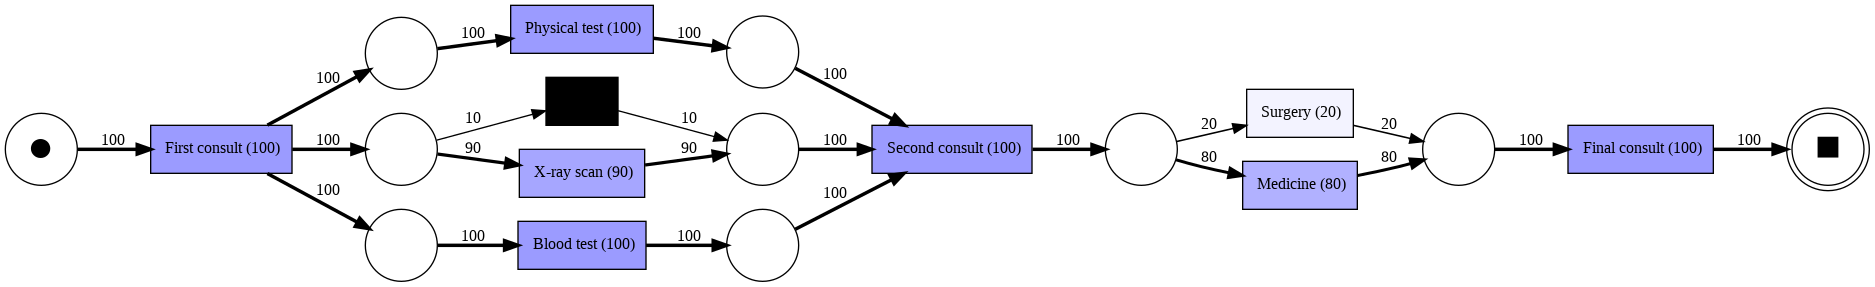

In [ ]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=event_log,)
pn_visualizer.view(gviz)

In [ ]:
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator

simplicity_ind = simplicity_evaluator.apply(net)
print(f"Простота: {simplicity_ind}\n")

fitness_ind = replay_fitness_evaluator.apply(event_log, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED,)
print(f"Пригодность воспроизведения (метод на основе токенов): {fitness_ind}\n")

prec_ind = precision_evaluator.apply(event_log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN,)
print(f"\nТочность (метод ETConformance): {prec_ind}\n")

gen_ind = generalization_evaluator.apply(event_log, net, initial_marking, final_marking,)
print(f"\nОбобщение: {gen_ind}\n")

Простота: 0.7599999999999999



replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

Пригодность воспроизведения (метод на основе токенов): {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}



replaying log with TBR, completed variants ::   0%|          | 0/39 [00:00<?, ?it/s]


Точность (метод ETConformance): 0.9840848806366048



replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]


Обобщение: 0.8603280868910275



#### **DFG граф**

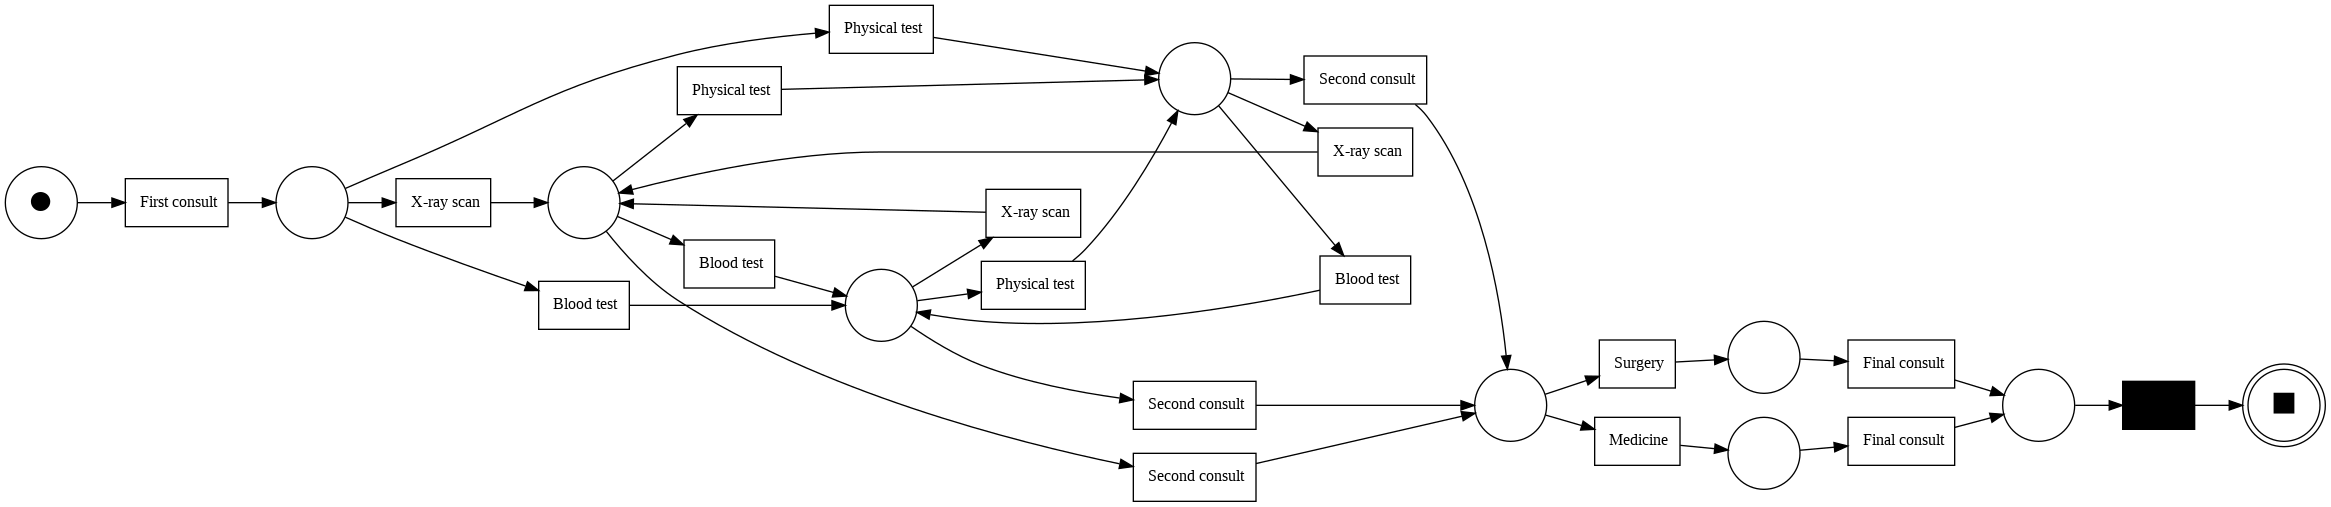

computing precision with alignments, completed variants ::   0%|          | 0/39 [00:00<?, ?it/s]


Precision = 0.7089171974522293



replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]


Generalization = 0.8341928368975338



aligning log, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]


Replay fitness = {'percFitTraces': 100.0, 'averageFitness': 1.0, 'percentage_of_fitting_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 0.9999915967092714}


Simplicity = 0.6363636363636362



In [ ]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.objects.conversion.dfg import converter as dfg_mining

dfg = dfg_discovery.apply(event_log)
net, initial_marking, final_marking = dfg_mining.apply(dfg)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)
precision = precision_evaluator.apply(event_log, net, initial_marking, final_marking)
print(f"\nPrecision = {precision}\n")
generalization = generalization_evaluator.apply(event_log, net, initial_marking, final_marking)
print(f"\nGeneralization = {generalization}\n")
replay_fitness = replay_fitness_evaluator.apply(event_log, net, initial_marking, final_marking)
print(f"\nReplay fitness = {replay_fitness}\n")
simplicity = simplicity_evaluator.apply(net)
print(f"\nSimplicity = {simplicity}\n")